# 0. At this point you should have:

1. performed CCS construction using __PacBio program__
2. filtered quality of the obtained reads using bamtools as follows:


```bash
$ bamtools filter -tag "np:>10" -in yourfile.ccs.bam | bamtools filter -tag "rq>0.999" | bamtools convert -format fastq -out yourfile.fastq
```

Now, __yourfile.fastq__ can be used as input to the Library instance. In other words, in this example, __yourfile.fastq__ here is __../data/quality_filtered/reads.filtered.fastq__

In [8]:
from classes import *
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Specify parameters:
    - path to data, 
    - start pattern of our target sequence,
    - barcode pattern
    - original sequence being mutated

In [18]:
file_path = '../data/quality_filtered/reads.filtered.fastq'
start_pattern = 'ATGAGCA'
barcode_pattern = r'GGAACA(.){20}'
reference_sq = 'ATGAGCAAGGGCGAGGAGCTGTTCACCGGGATCGTGCCCGTCCTGATTGAGCTGGACGGCGACGTACACGGCCACAAGTTCAGCGTGCGCGGCGAGGGCGAGGGCGATGCCGACTACGGCAAGCTGGAGATCAAGTTCATCTGCACCACCGGCAAGCTGCCCGTGCCCTGGCCCACCCTCGTGACCACCCTGTCGTACGGCATTTTGTGCTTCGCGCGCTACCCCGAACACATGAAGATGAACGACTTCTTCAAGTCCGCCATGCCCGAAGGCTACATCCAGGAGCGCACCATCTTCTTCCAGGACGACGGCAAGTACAAGACCCGTGGGGAGGTGAAGTTCGAGGGCGACACACTGGTGAACCGCATCGAGCTGAAGGGCATGGACTTCAAGGAGGACGGCAACATCCTGGGGCACAAGCTGGAGTACAACTTTAACAGCCACAACGTCTATATCATGCCAGACAAGGCTAATAACGGCCTGAAGGTGAACTTCAAGATCCGCCACAACATCGAGGGCGGCGGGGTGCAGCTCGCCGACCACTACCAGACGAACGTTCCCTTGGGCGACGGCCCCGTGCTGATCCCCATCAACCACTACCTGAGCTGTCAGACAGCCATCAGCAAAGACCGTAACGAGACTCGCGATCACATGGTCTTTCTGGAGTTCTTTAGTGCCTGTGGGCATACTCACGGCATGGACGAGCTGTACAAGTGATGATGAGCGGCGCCTA'

# 2. Import reads from a fastq file

In [3]:
library = Library(file_path)

# 3. Find sequence start

#### 3.1. Find the target sequence start in all the reads of our library and crop everything up until the start

In [4]:
library.trim_start(start_pattern)

#### 3.2. Clean all the empty reads

In [5]:
library.clean_library()

# 4. Find barcode pattern

#### 4.1. Behind the scene steps:
    - Find where the barcode is,
    - Trim it together with the specified bits of the sequence, 
    - Store it in a separate feature of the read (read.bc) together with its quality (read.bc_quality)

In [6]:
library.get_bc_and_trim(barcode_pattern, indentation=6, bc_length=20)

#### 4.2. Clean all the empty reads

In [7]:
library.clean_library()

# 5. Visualize

Text(0.5,1,'Read length distribution')

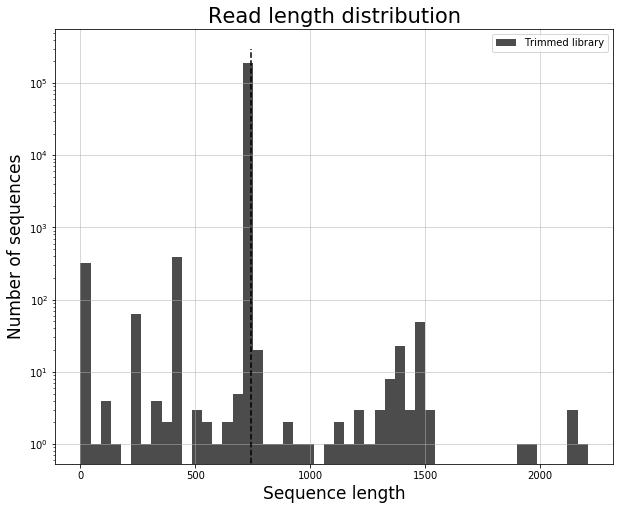

In [14]:
log=True

plt.figure(figsize=[10,8])
plt.hist([sq.length for sq in library.sequences],bins=50,log=log,color='k',alpha=0.7,label='Trimmed library')
plt.grid(lw=0.5)
plt.plot([733,733],[0,300000],'--k')
plt.legend()
plt.xlabel('Sequence length',fontsize=17)
plt.ylabel('Number of sequences',fontsize=17)
plt.title('Read length distribution', fontsize=21)

# 6. Filter library based on read length

#### After all the trimming, our target product length (selected) should be 733:

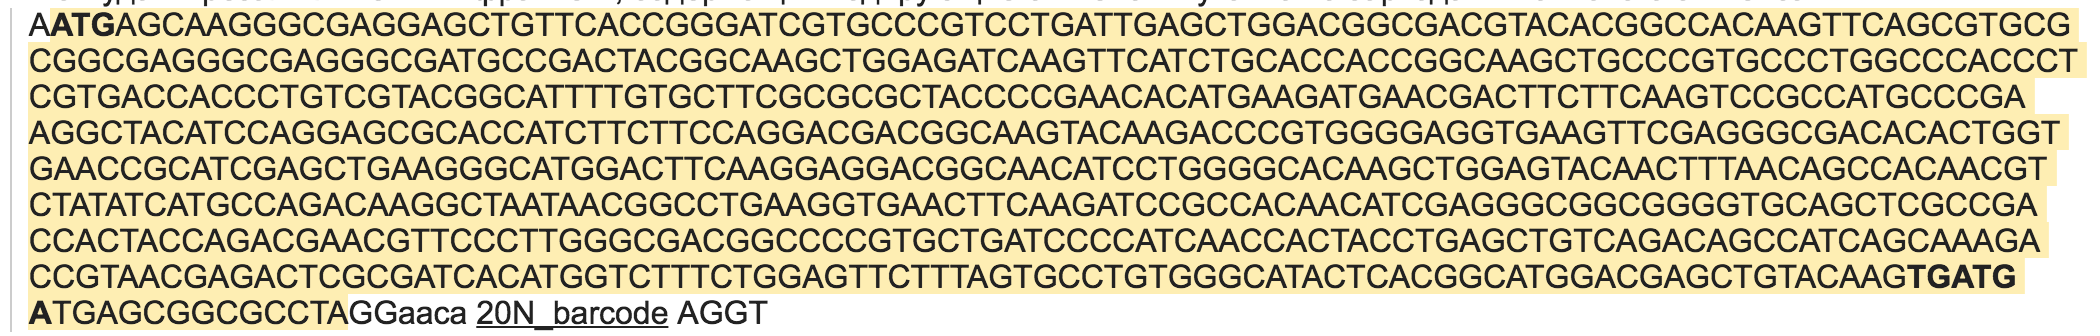

In [15]:
library.filter_by_length(length=733)

# 7. Describe mutations

#### 7.1. Convert sequences to lists of mutations

In [ ]:
library.extract_mutations(reference_sq)

In [ ]:
plt.figure(figsize=[10,8])
plt.plot([sq.bc])
plt.grid(lw=0.5)